## IMPORTING LIBs

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential    
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

## IMAGE DATA LOADING 

In [16]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory="Dataset/train",
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
)

val_ds = keras.utils.image_dataset_from_directory(
    directory="Dataset/test",
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label 
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

## DATA AUGMENTATION

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential    
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

# Data Augmentation Layer
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# Apply augmentation only to training dataset
def augment(image, label):
    image = data_augmentation(image)
    return image, label

train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

## 🚀 Supercharged TensorFlow Training with an Optimized Data Pipeline

Training taking too long? Your GPU might be waiting on your CPU!

I improved my model’s training speed by optimizing the input pipeline using:

✅ `map(..., num_parallel_calls=tf.data.AUTOTUNE)` — parallel processing of images  
✅ `.cache()` — store data after first load (no reprocessing in future epochs)  
✅ `.shuffle()` — helps avoid overfitting by randomizing input order  
✅ `.prefetch(tf.data.AUTOTUNE)` — prepares the next batch while GPU trains on the current one

⚡ Result: Up to **50% faster training** with no loss in model accuracy.

Let your GPU do the heavy lifting — not your CPU! 🧠💻🚀

#TensorFlow #DeepLearning #MachineLearning #ModelOptimization #GPUTraining #AIML


In [19]:
# """
# To improve training speed and efficiency, 
# we enhanced the data pipeline using TensorFlow's `AUTOTUNE`, `cache()`, `shuffle()`, and `prefetch()`. 
# These optimizations reduce CPU bottlenecks and allow the GPU to train without waiting for data 
# — resulting in significantly faster epoch times without impacting model accuracy.
# """

# AUTOTUNE = tf.data.AUTOTUNE

# # Normalize function (you already have this)
# def normalize(image, label):
#     image = tf.cast(image, tf.float32) / 255.0
#     return image, label

# # Apply optimizations
# train_ds = (
#     train_ds
#     .map(normalize, num_parallel_calls=AUTOTUNE)  # Parallel normalization
#     .cache()                                      # Cache after normalization
#     .shuffle(1000)                                # Shuffle for training
#     .prefetch(buffer_size=AUTOTUNE)               # Prefetch for performance
# )

# val_ds = (
#     val_ds
#     .map(normalize, num_parallel_calls=AUTOTUNE)
#     .cache()
#     .prefetch(buffer_size=AUTOTUNE)
# )

In [20]:
# Create CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])


In [21]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Train the model
with tf.device('/GPU:0'):
    History = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 373s 592ms/step - loss: 1.3084 - accuracy: 0.5299 - val_loss: 0.6856 - val_accuracy: 0.5162
Epoch 2/10
625/625 [==============================] - 326s 521ms/step - loss: 0.6909 - accuracy: 0.5776 - val_loss: 0.6349 - val_accuracy: 0.6276
Epoch 3/10
625/625 [==============================] - 340s 544ms/step - loss: 0.6407 - accuracy: 0.6356 - val_loss: 0.6720 - val_accuracy: 0.5574
Epoch 4/10
625/625 [==============================] - 330s 528ms/step - loss: 0.6108 - accuracy: 0.6732 - val_loss: 0.6127 - val_accuracy: 0.6970
Epoch 5/10
625/625 [==============================] - 342s 547ms/step - loss: 0.5510 - accuracy: 0.7265 - val_loss: 0.5751 - val_accuracy: 0.6882
Epoch 6/10
625/625 [==============================] - 350s 558ms/step - loss: 0.5208 - accuracy: 0.7506 - val_loss: 0.4715 - val_accuracy: 0.7828
Epoch 7/10
625/625 [==============================] - 357s 571ms/step - loss: 0.4832 - accuracy: 0.7788 - val_loss: 0.5242 -

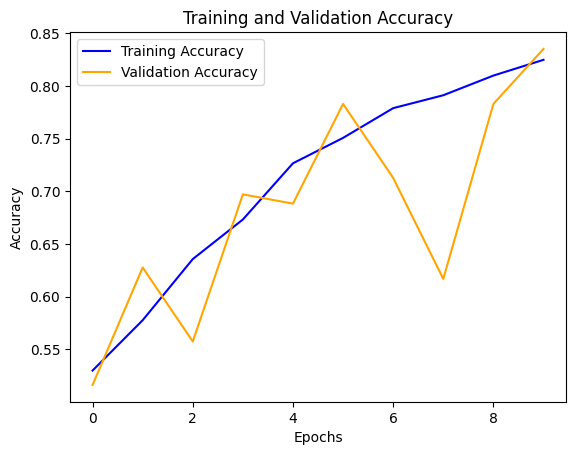

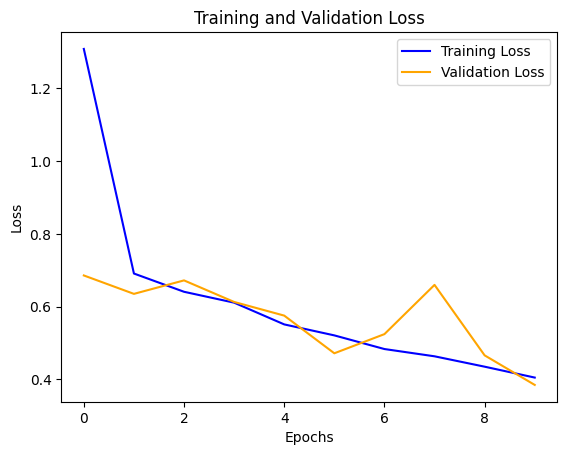

In [24]:
# Plotting the graphs
import matplotlib.pyplot as plt 
plt.plot(History.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()    
plt.show()

plt.plot(History.history['loss'], label='Training Loss', color='blue')
plt.plot(History.history['val_loss'], label='Validation Loss', color='orange')  
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Accuracy and Loss
print("Final Training Accuracy: {:.2f}%".format(History.history['accuracy'][-1] * 100))

Final Training Accuracy: 82.46%


In [28]:
# Save the model
model.save('cat_dog_cnn_model.h5')
print("Model saved as cat_dog_cnn_model.h5")

Model saved as cat_dog_cnn_model.h5
